# Facial Keypoint Detection Kaggle Competition

Kaggle competition to detect eyes, mouth and nose in grayscaled images.

In [23]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
%aimport keypoints
%aimport plots
%aimport data
%aimport pipeline
%aimport submit
%aimport features

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Run pipeline

Set up the model, learn and predict.

In [26]:
X, Y, header = data.df_train()
Xpredict = data.df_predict()

In [27]:
p = pipeline.Pipeline()
estimator = p.train(p.model(), X, Y)

In [28]:
Ypredict = p.predict(estimator, Xpredict)

## Images and keypoints from the training set

These are the given keypoints.

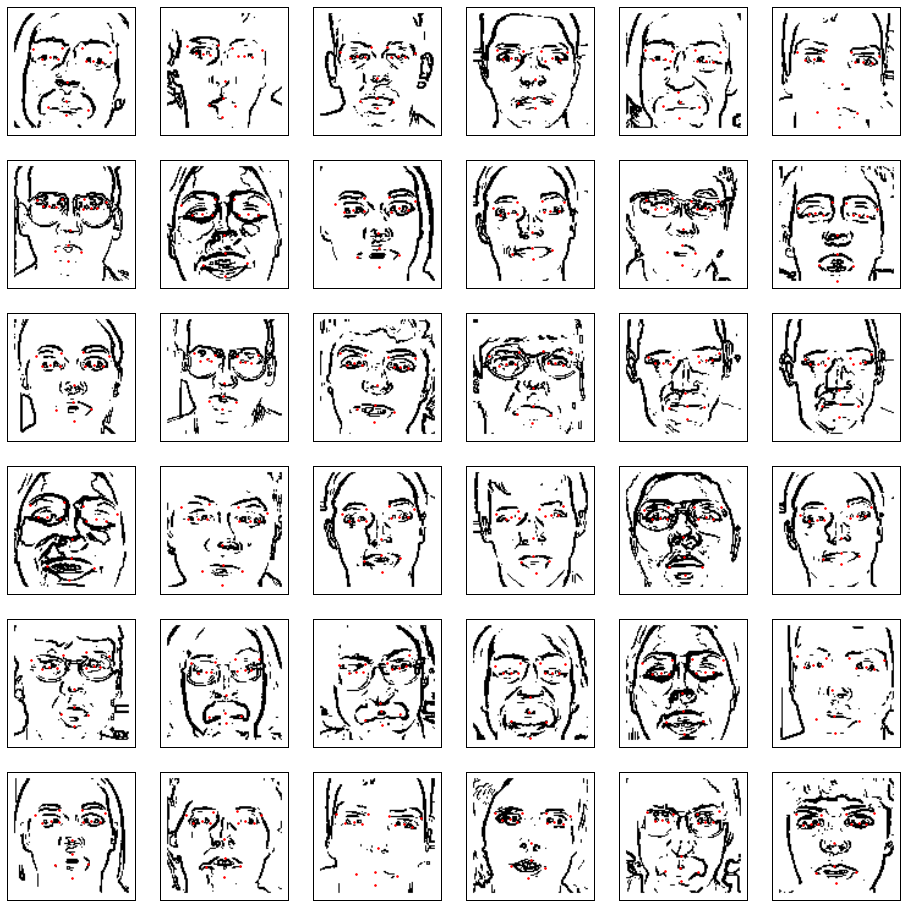

In [30]:
plots.show_preprocessed_imgs(p, X, Y, color = 'red')

## Predicted Keypoints

Using our model.

In [ ]:
plots.show_preprocessed_imgs(p, Xpredict, Ypredict, color = 'red')

##### Cross Evaluation

Model evaluation with 10 folds.

In [21]:
p.evaluate(estimator, X, Y)

In [22]:
p.evaluation

{'lower_confidence_bound': 1.9471863569981149,
 'mean': 2.7060059692283676,
 'std': 0.75881961223025263,
 'upper_confidence_bound': 3.4648255814586202,
 'values': '2.10887737267,2.07646175904,1.9874494473,2.05757885024,2.06366464273,2.5169795533,2.97355447248,3.40434104246,4.07182722332,3.79932532875'}